In [1]:
from symbulate import *
%matplotlib inline

In [2]:
P = BoxModel([1, 2, 3, 4], size=2, replace=True)
P.sim(5)

0,"(1, 2)"
1,"(3, 3)"
2,"(4, 2)"
3,"(1, 4)"
4,"(4, 4)"


In [3]:
P.sim(16000).tabulate()

"(1, 1)",951
"(1, 2)",1034
"(1, 3)",1011
"(1, 4)",953
"(2, 1)",1027
"(2, 2)",984
"(2, 3)",1020
"(2, 4)",1008
"(3, 1)",968
"(3, 2)",980
"(3, 3)",973


In [4]:
P.sim(16000).tabulate(normalize=True)

"(1, 1)",0.062125
"(1, 2)",0.0631875
"(1, 3)",0.062
"(1, 4)",0.0594375
"(2, 1)",0.0620625
"(2, 2)",0.062375
"(2, 3)",0.061625
"(2, 4)",0.0631875
"(3, 1)",0.06325
"(3, 2)",0.061375
"(3, 3)",0.0631875


In [5]:
P = BoxModel([1, 2, 3, 4], size=2)
X = RV(P, sum)
Y = RV(P, max)
Z = RV(P) # default is identity; will return outcomes

In [6]:
outcome = (3,  2)
X(outcome), Y(outcome), Z(outcome)

(5, 3, (3, 2))

In [7]:
X.sim(5)

0,3
1,6
2,4
3,4
4,7


In [8]:
x = X.sim(16000)
x.tabulate()

2,987
3,2022
4,3016
5,3929
6,2951
7,2064
8,1031
Total,16000


(5.0094375, 1.5904318387135459)

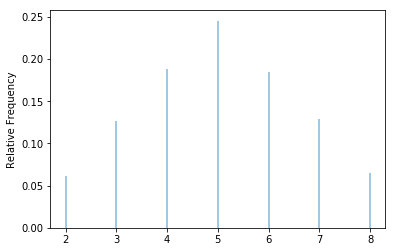

In [9]:
x.plot()
x.mean(), x.sd()

(3.1055, 0.9364666304786307)

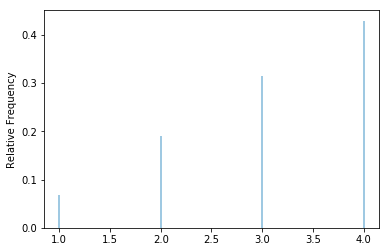

In [10]:
y = Y.sim(10000)
y.plot()
y.mean(), y.sd()

In [11]:
(Z & X & Y).sim(5)

0,"((1, 4), 5, 4)"
1,"((1, 4), 5, 4)"
2,"((2, 3), 5, 3)"
3,"((4, 2), 6, 4)"
4,"((4, 4), 8, 4)"


In [12]:
xy = (X & Y).sim(16000)
xy.tabulate()

"(2, 1)",978
"(3, 2)",1975
"(4, 2)",1034
"(4, 3)",1999
"(5, 3)",2037
"(5, 4)",1981
"(6, 3)",1025
"(6, 4)",2007
"(7, 4)",2022
"(8, 4)",942
Total,16000


In [13]:
xy.tabulate(normalize=True)

"(2, 1)",0.061125
"(3, 2)",0.1234375
"(4, 2)",0.064625
"(4, 3)",0.1249375
"(5, 3)",0.1273125
"(5, 4)",0.1238125
"(6, 3)",0.0640625
"(6, 4)",0.1254375
"(7, 4)",0.126375
"(8, 4)",0.058875
Total,1.0


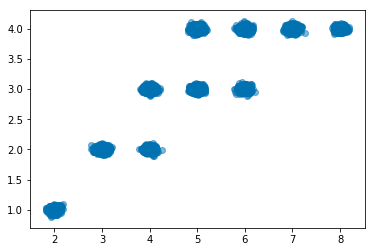

In [14]:
xy.plot(jitter=True)

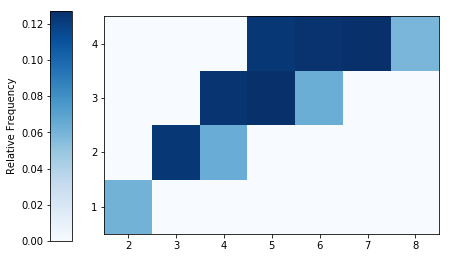

In [15]:
xy.plot('tile')

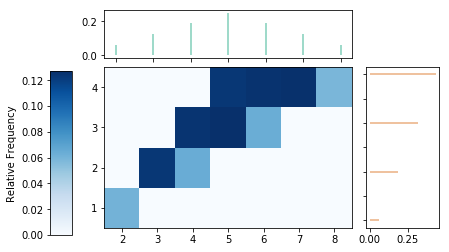

In [16]:
xy.plot(['tile', 'marginal'])

In [17]:
(Y | (X == 6) ).sim(10000).tabulate()

3,3373
4,6627
Total,10000


3.6686

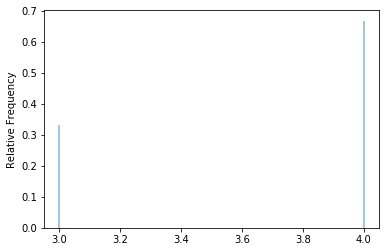

In [18]:
y_given_Xeq6 = (Y | (X == 6) ).sim(10000)
y_given_Xeq6.plot()
y_given_Xeq6.mean()

6.2857

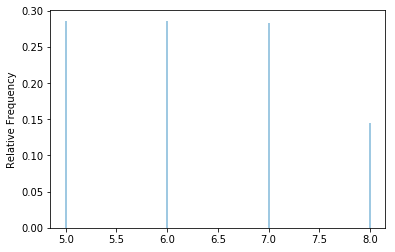

In [19]:
x_given_Yeq4 = (X | (Y == 4) ).sim(10000)
x_given_Yeq4.plot()
x_given_Yeq4.mean()

16.7854

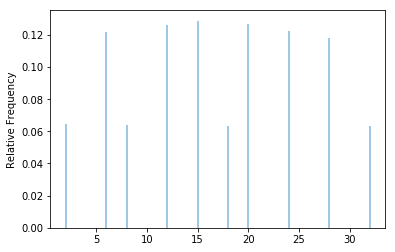

In [20]:
W = X * Y
w = W.sim(10000)
w.plot()
w.mean()

# Exercise 2.4

Note: Python has zero-based indexing, so `X[0]` represents $X_1$.

In [21]:
P = BoxModel([1, 0], size=3, replace=True)
X = RV(P)
S = RV(P, cumsum)

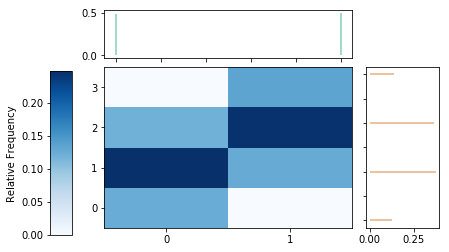

In [22]:
(S[0] & S[2]).sim(10000).plot(['tile','marginal'])

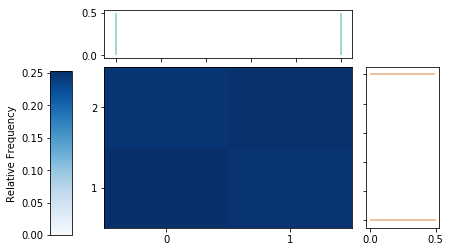

In [23]:
( (S[0] & S[2]) | (S[1] == 1) ).sim(10000).plot(['tile','marginal'])

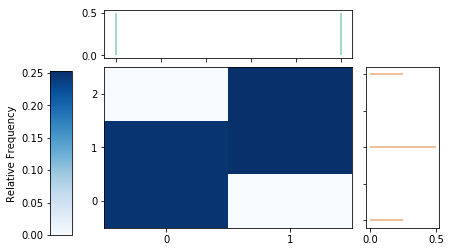

In [24]:
( (S[1] & S[2]) | (S[0] == 0) ).sim(10000).plot(['tile','marginal'])

# Exercise 2.5

In [35]:
P = BoxModel([0, 1], size=10) * BoxModel([1,2,3,4,5,6], size=10)
flips = RV(P)[0]
rolls = RV(P)[1]
W = flips.apply(sum)
X = 10 - W
Y = rolls.apply(count_eq(6))

def is_even(x):
    return (x % 2 == 0)

Z = rolls.apply(count(is_even))

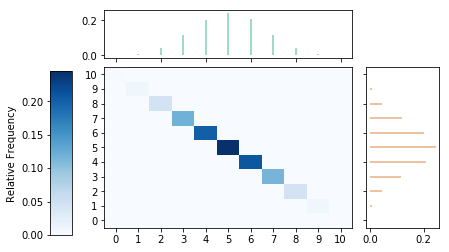

In [26]:
(W & X).sim(10000).plot(['tile', 'marginal'])

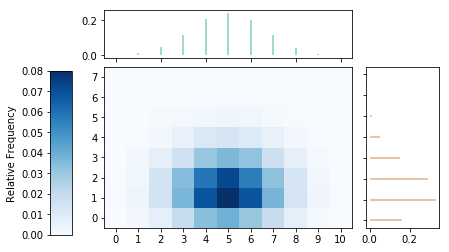

In [27]:
(W & Y).sim(10000).plot(['tile', 'marginal'])

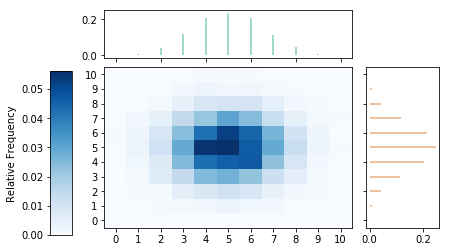

In [36]:
(W & Z).sim(10000).plot(['tile', 'marginal'])

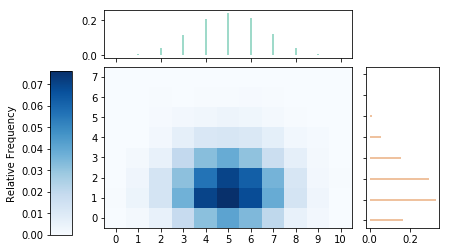

In [28]:
(X & Y).sim(10000).plot(['tile', 'marginal'])

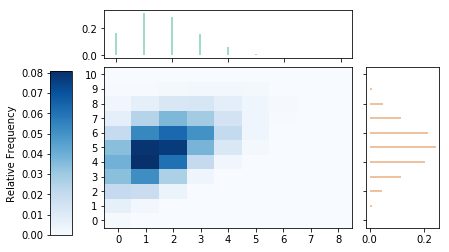

In [37]:
(Y & Z).sim(10000).plot(['tile', 'marginal'])

# Exercise 2.6

In [29]:
# define a function that takes as an input a sequence of coin flips
# and returns the number of flips which follow H
def trials_following_H(x):
    return sum(x[0:len(x)-1])

# define a function that takes as an input a sequence of coin flips
# and returns the number of flips which follow H that result in H
def H_following_H(x):
    return sum(a*b for a, b in zip(x[1:len(x)], x[0:len(x)-1]))

# probability space corresponding to four fair coin flips
P = BoxModel([0,1], size = 4)

# N is the RV representing the number of flips which follow H
N = RV(P, trials_following_H)

# X is the RV representing the number of flips which follow H that result in H
X = RV(P, H_following_H)

0.3937833333333333

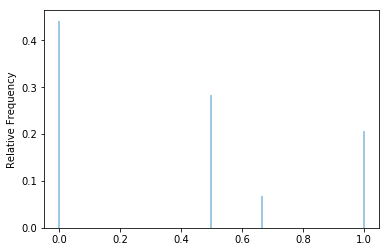

In [30]:
x = ( (X / N) | (N > 0) ).sim(10000)
x.plot()
x.mean()

In [31]:
x.tabulate(normalize=True)

0.0,0.4418
0.5,0.2829
0.6666666666666666,0.0689
1.0,0.2064
Total,1.0
